In [4]:
#script to plot the koulakov dynamics
import numpy as np
import matplotlib.pyplot as plt

def plotplane_nonlin_loop(X,Y,fx,fy,showplot):
    #two distinct real eigenvalues. stable node
    
    [nsx,nsy] = X.shape
    U = np.zeros(X.shape)
    V = np.zeros(X.shape)
    for m in range(nsx):
        for n in range(nsy):
            U[m,n] = fx(X[m,n],Y[m,n])
            V[m,n] = fy(X[m,n],Y[m,n])
    #M = np.array([[-2,0],[1,-4]]) #stable

    speed = np.sqrt(U*U + V*V)

    fig0, ax0 = plt.subplots()
    strm = ax0.streamplot(X, Y, U, V, color=speed, linewidth=2)
    fig0.colorbar(strm.lines)

    if showplot:
        plt.show()  
    return fig0,ax0

In [2]:
def koulakov_line(S1,S2,I):
    import math
    import numpy as np
    #koulakov_line(X,Y,L,n,a,dt,I_K)
    #modfun = @(s,I) koulakov_line(s(1),s(2),L,n,m,b,a,tanmin,tanmax,gradfact,I);
    #function to calculate the dynamics for a koulakov line
    
    #S1 = S[0]
    #S2 = S[1]
    dt = 1.0e-3 #multiplicative factor for gradient
    pi = math.pi
    
    #parameters for number of stable points, length of line, etc
    L = 0.7 #length of stable line in state space
    n = 7.0 #number of stable points
    theta = pi/4.0 #the rotation angle of line from horizontal in state space (make it diagonal
    a = 0.2; #amplitude of oscillations in state space         
    
    #the rotation of the line
    A = np.array([[math.cos(theta),-math.sin(theta)],
                              [math.sin(theta),math.cos(theta)]]) #the rotation matrix
    R0 = np.array([L/2.0,1.0]) #point around which to roate
    F = A.dot([S1,S2]-R0)+R0
    #F = mvMul(A,(S-R0))+R0
    S1r = F[0] #rotated S1
    S2r = F[1] #rotated S2    
    
    #the main functions of the koulakov line, in rotated coordinates
    u = a*math.sin((n-1)*pi/L*S1r+pi)
    f = math.tanh( (pi/a)*(u-2.0*(S2r-0.5)))
    g = math.tanh( (pi/a)*(-u-2.0*(S2r-0.5)))
    
    #boundary conditions. don't use rotated coordinates
    steep = 3.0
    ramprange = 4.0*(n-1); #support of which the tanh will ramp up on bc in x direction
    offset = (steep-1)/(ramprange)

    bcS1 = (10.0*math.tanh(-pi/steep*ramprange*(S1+offset)) - 
            10.0*math.tanh(pi/steep*ramprange*(S1-0.65-offset)))                       
    bcS2 = (10.0*math.tanh(- 2.0*pi/(steep*a)*(S2-L-offset))+
                        10.0*math.tanh( -2.0*pi/(steep*a)*(S2+offset)))
    
    #final gradients
    K1 = dt*(f+bcS1) + I[0]
    K2 = dt*(g+bcS2) + I[1]   
          
    return K1,K2

In [3]:
Y, X = np.mgrid[0:1:500j, 0:1:500j]

ifact = 7.5e-4 #scaling factor, found by inspection
coh = -7.0
I_k = [0,0]
I_kbase = ifact*(1+abs(coh)/100.0);
if coh < 0:
    I_k = [-I_kbase,I_kbase]
elif coh > 0:
     I_k = [I_kbase,-I_kbase]

fx = lambda x,y: koulakov_line(x,y,I_k)[0]
fy = lambda x,y: koulakov_line(x,y,I_k)[1]
fplane = plotplane_nonlin_loop(X,Y,fx,fy,True)


NameError: global name 'jet' is not defined

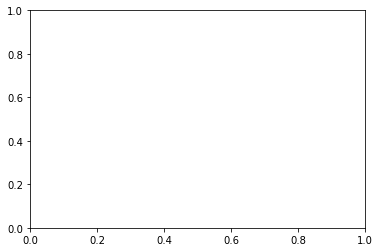

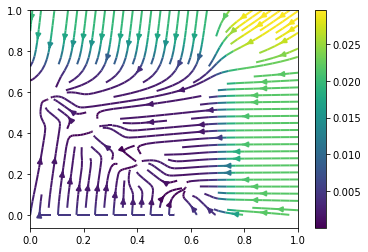

In [5]:
fplane = plotplane_nonlin_loop(X,Y,fx,fy,True)